<a href="https://colab.research.google.com/github/KhushalM1432/Deep-Learning/blob/main/5_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with CNN (Convolutional Neural Network)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Load Image Dataset From Keras

In [2]:
from keras.datasets import mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

In [3]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Visualizing Handwritten Digits From Data

In [9]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

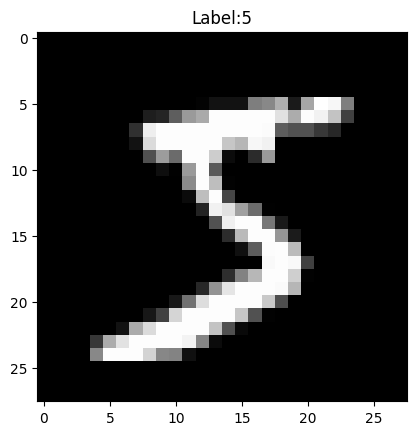

In [11]:
plt.imshow(xtrain[0], cmap = "gray")
plt.title(f"Label:{ytrain[0]}")
plt.show()

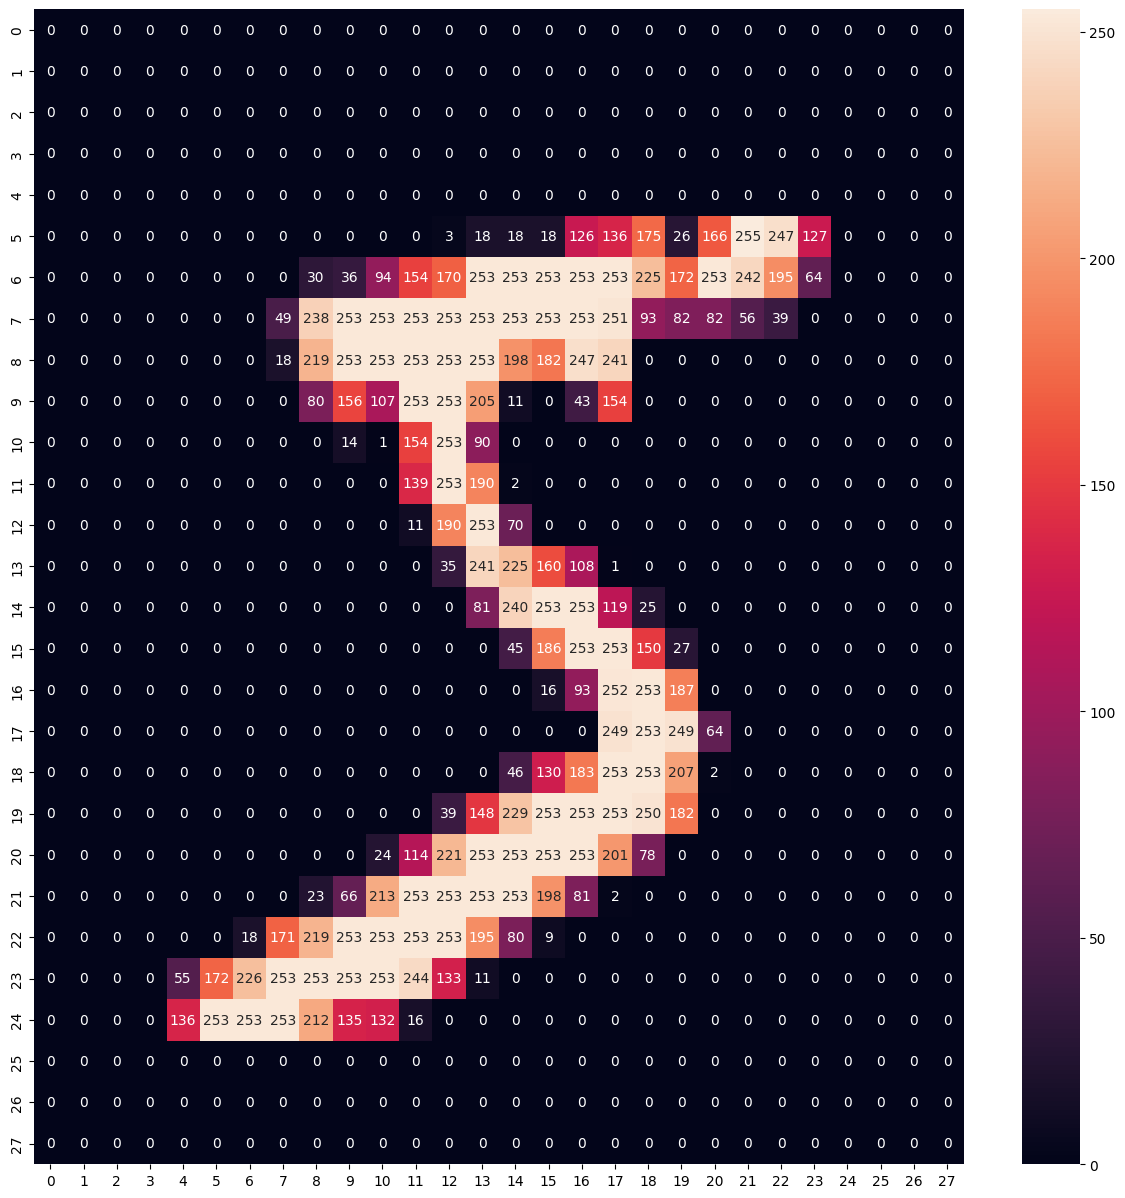

In [12]:
plt.figure(figsize = (15, 15))
sns.heatmap(xtrain[0], annot = True, fmt = "d")
plt.show()

### Visualize First 9 Images From Train Data

In [13]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

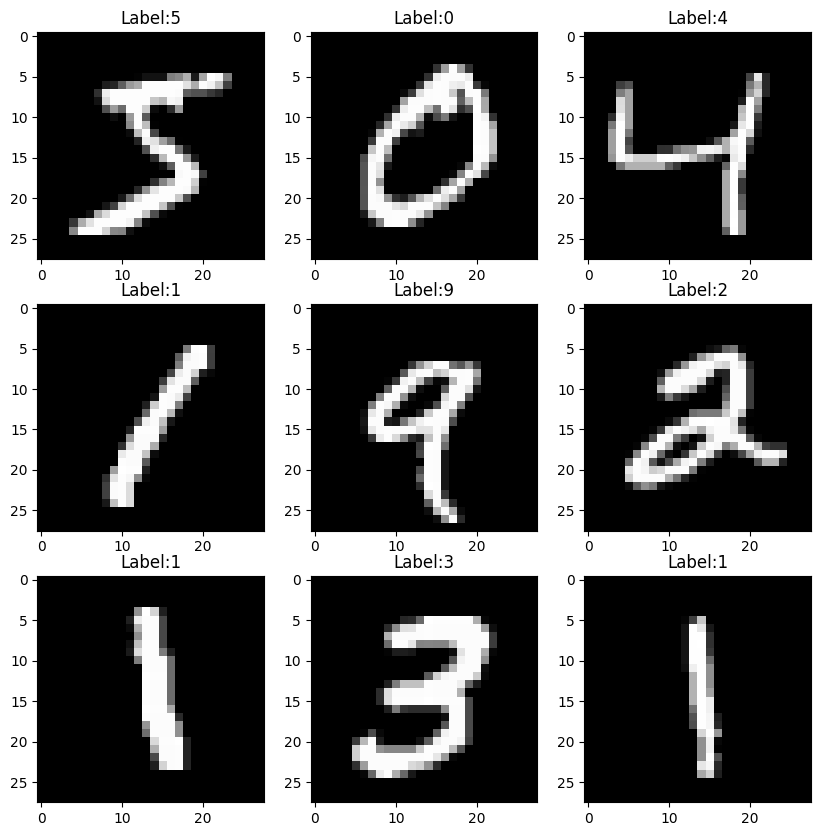

In [14]:
plt.figure(figsize = (10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap = "gray")
  plt.title(f"Label:{ytrain[i]}")

# Show the plot
plt.show()

### Preprocessing on Data

In [15]:
import numpy as np

In [16]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [18]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Because above is multiclass classification problem you need to one hot encode y data

In [19]:
import numpy as np

In [20]:
# Make sure the image shape is (28, 28, 1)
xtrain_scl = np.expand_dims(xtrain_scl, -1)
xtest_scl = np.expand_dims(xtest_scl, -1)

In [21]:
from keras.utils import to_categorical

In [22]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [23]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

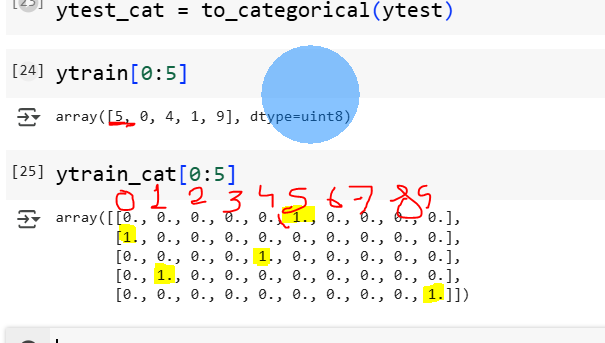

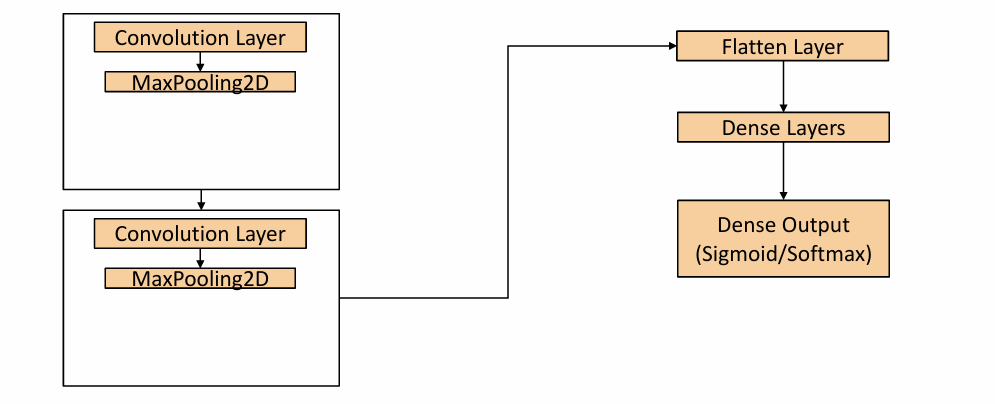

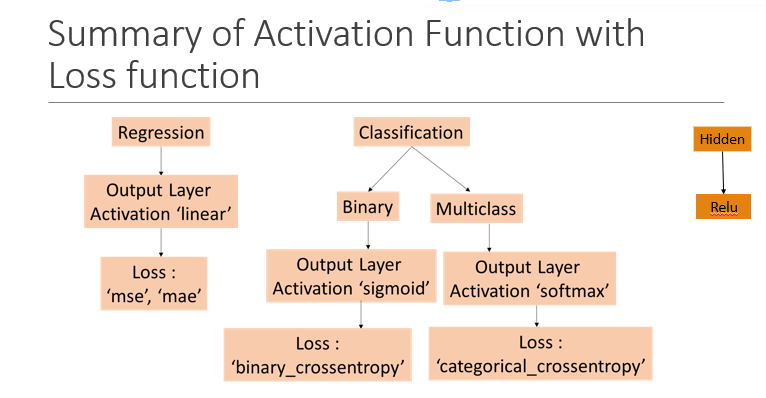

In [25]:
xtrain.shape

(60000, 28, 28)

In [26]:
ytrain_cat.shape

(60000, 10)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input

In [28]:
model = Sequential(
    [
        Input(shape = (28, 28, 1)),
        Convolution2D(32, kernel_size = (3,3), activation = "relu"),
        MaxPooling2D(pool_size = (2,2)),
        Convolution2D(64, kernel_size = (3,3), activation = "relu"),
        MaxPooling2D(pool_size = (2,2)),
        Flatten(),
        Dropout(0,5),
        Dense(10, activation="softmax")
    ]
)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs = 20, batch_size=32)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8892 - loss: 0.3723 - val_accuracy: 0.9853 - val_loss: 0.0530
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0585 - val_accuracy: 0.9870 - val_loss: 0.0471
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9885 - val_loss: 0.0452
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9899 - loss: 0.0303 - val_accuracy: 0.9892 - val_loss: 0.0398
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9910 - val_loss: 0.0376
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9905 - val_loss: 0.0350
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9965 - loss: 0.01

### Plot the Learning Curve

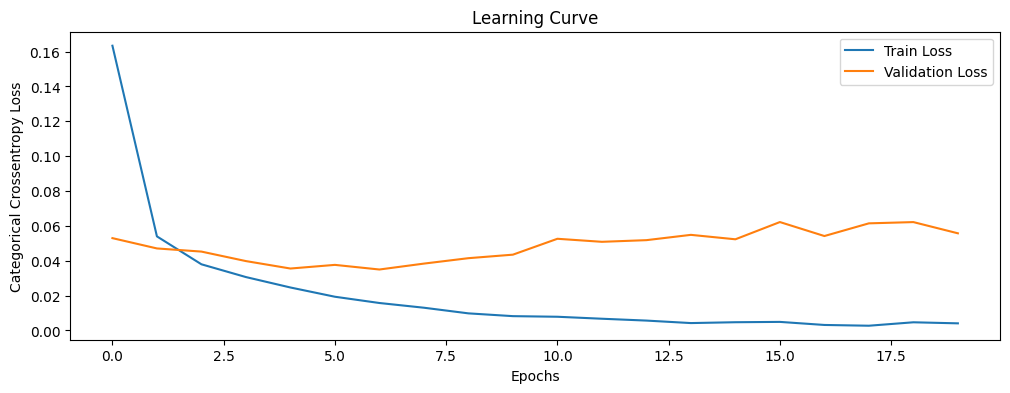

In [32]:
plt.figure(figsize = (12, 4))
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Model Evaluation

In [33]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9992 - loss: 0.0022


[0.007488613948225975, 0.9983999729156494]

In [34]:
model.evaluate(xtest_scl, ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0643


[0.05019880086183548, 0.9912999868392944]

In [35]:
yprob_train = model.predict(xtrain_scl)
yprob_train[0:5]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([[1.5556624e-24, 9.4231694e-23, 1.9532251e-25, 9.5109023e-09,
        1.1542616e-27, 1.0000000e+00, 5.6527169e-29, 2.0814040e-17,
        6.7655863e-17, 2.6374863e-14],
       [1.0000000e+00, 1.5500211e-34, 1.3071271e-19, 5.7619014e-28,
        3.9283449e-21, 1.4273967e-26, 4.4717730e-20, 3.6895148e-25,
        2.2207069e-21, 8.8779724e-18],
       [3.1112277e-30, 2.0927088e-10, 1.0061375e-15, 4.8461422e-21,
        1.0000000e+00, 2.2210809e-20, 9.0017799e-22, 5.6917619e-14,
        1.2059346e-17, 1.5963481e-18],
       [3.5434556e-15, 1.0000000e+00, 7.3787296e-12, 2.9254168e-22,
        2.4177099e-10, 1.2410344e-17, 1.5050038e-13, 5.2416302e-13,
        4.4693444e-08, 3.6535927e-16],
       [2.3629555e-22, 2.1341286e-19, 5.7259215e-21, 1.7779021e-18,
        6.7705802e-10, 1.2718100e-21, 3.7612020e-28, 2.7018715e-14,
        3.0393568e-09, 1.0000000e+00]], dtype=float32)

In [36]:
ypred_train = np.argmax(yprob_train, axis = 1)

In [37]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [38]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [39]:
yprob_test = model.predict(xtest_scl)
ypred_test = np.argmax(yprob_test, axis = 1)
ypred_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, 0, 4])

In [40]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

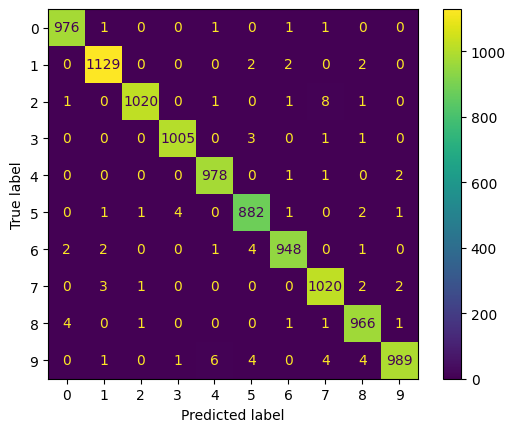

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### From above results the model is a good model because f1_macro > 0.8

Save the Model

In [43]:
model.save("digit_model.keras")

### Load the Model

In [44]:
from keras.models import load_model
m = load_model("/content/digit_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

### Out of Sample Training

In [45]:
import cv2

In [46]:
img = cv2.imread("/content/Image3.jpg", cv2.IMREAD_GRAYSCALE)
img

array([[  1,   0,   2,   0,   0,   0,   0,   1,   0,   0,   1,   1,   1,
          0,   0,   2,   2,   0,   3,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  1,   0,   0,   2,   0,   0,   5,   0,   0,   5,   0,   0,   0,
          3,   1,   0,   0,   4,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   3,   3,   0,   0,   1,   0,   0,   3,   0,
          0,   2,   2,   0,   3,   0,   0,   1,   3,   0,   4,   0,   0,
          0,   0],
       [  2,   2,   0,   2,   0,   0,   1,   1,   1,   0,   3,   0,   0,
          4,   0,   0,   1,   0,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  74, 222, 249, 255, 255, 253, 252, 255,
        255, 253, 255, 255, 253, 250, 227,  96,   0,   3,   1,   0,   0,
          0,   0],
       [  0,   3,   0,   1,   0, 222, 255, 255, 255, 255, 252, 255, 255,
        251, 255, 250, 252, 255, 255, 255, 245,   3,   1,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2, 121, 255, 250, 252, 255, 254, 255, 250,
        255, 255, 255, 255, 255, 253, 255, 253,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   3,   2,   0,   0,   2,   1,   3,   0,   1,   0,
          1,   0, 102, 255, 254, 255, 255, 150,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,
          0,   1, 229, 255, 255, 255, 149,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   1,   2,
         93, 227, 255, 252, 253,  10,   2,   0,   2,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   3,   0, 126,
        255, 247, 255, 255, 170,   0,   1,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  95, 220, 255,
        254, 255, 255, 164,  11,   0,   2,   2,   3,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 253, 255, 252,
        255, 182,   8,   1,   0,   3,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  75, 239, 251, 254, 255,
        255, 255, 253, 227,  95,   0,   1,   0,   4,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 220, 254, 255, 255, 249,
        255, 255, 255, 255, 242, 106,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 120, 255, 253, 255, 255,
        254, 254, 253, 255, 255, 255, 125,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   1,   0,   3,   0,   0,   1,   2,   0,   0,   0,
          1,   0, 120, 253, 255, 251, 255, 122,   0,   0,   1,   0,   0,
          0,   0],
       [  1,   4,   0,   0,   1,   1,   0,   6,   0,   0,   2,   1,   1,
          0,   3,   0,  10, 186, 254, 255, 245,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   4,   2,   1,   0,   2,   0,   3,   0,   0,   2,   0,
          5,   0,   1,   0,   9, 255, 252, 255,   6,   0,   2,   0,   0,
          0,   0],
       [  3,   0,   0,   2,   0,   2,  73, 188,  96,   0,   2,   0,   2,
          2,   0,   1,   1,  69, 255, 255, 254,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   1,   0,   1, 233, 253, 242,   4,   0,   0,   0,
          1,   2,   0,   2, 234, 253, 255, 253,   4,   1,   0,   0,   0,
          0,   0],
       [  3,   0,   5,   0,   2,   0, 249, 255, 255, 221, 105,   0,   1,
          1,   0,  75, 222, 254, 254, 255, 150,   1,   0,   3,   0,   0,
          0,   0],
       [  0,   4,   0,   0,   2,   0, 249, 255, 252, 255, 255, 254, 252,
        255, 253, 255, 255, 255, 255, 251,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   1,   1,   0, 120, 255, 255, 254, 253, 255, 255,
        254, 255, 252, 253, 255, 253, 155,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

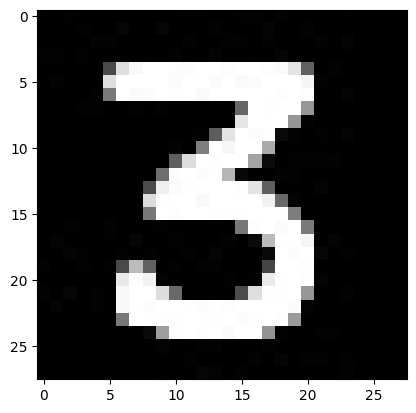

In [47]:
plt.imshow(img, cmap = "gray")
plt.show()

In [48]:
img_scl = img.astype("float32")/255

In [49]:
img_scl = img_scl.reshape(1, 28, 28, 1)

In [50]:
img_scl

array([[[[0.00392157],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00392157],
         

In [51]:
prob = model.predict(img_scl)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


array([[7.2678755e-36, 3.9892830e-34, 2.2423949e-23, 1.0000000e+00,
        3.5624754e-35, 9.2241224e-20, 2.1868460e-28, 7.9797032e-36,
        6.4970436e-19, 1.1891377e-24]], dtype=float32)

In [52]:
np.max(prob)

1.0

In [53]:
pred = np.argmax(prob, axis = 1)

In [54]:
pred

array([3])

In [55]:
def predict_digit(model, img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap = "gray")
  plt.show()
  img_scl = img.astype("float32")/255
  img_scl = img.reshape(1, 28, 28, 1)
  prob = model.predict(img_scl)
  pred = np.argmax(prob, axis = 1)
  max_prob = np.max(prob, axis = 1)
  return pred, max_prob

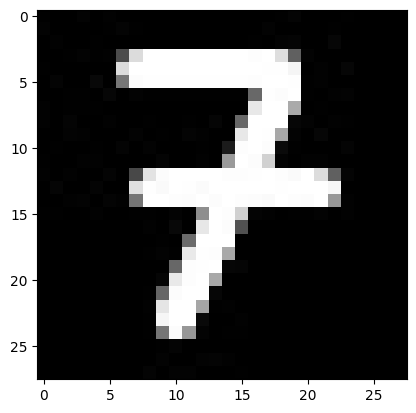

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


(array([2]), array([1.], dtype=float32))

In [56]:
predict_digit(model, "/content/Image7.jpg")

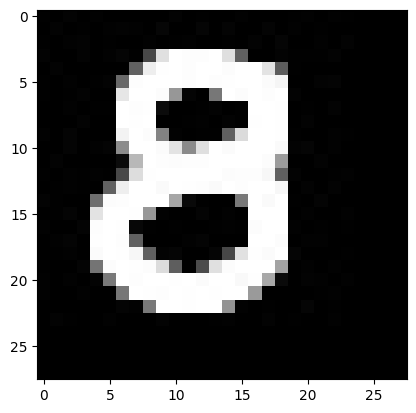

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(array([8]), array([1.], dtype=float32))

In [57]:
predict_digit(model, "/content/Image8.jpg")

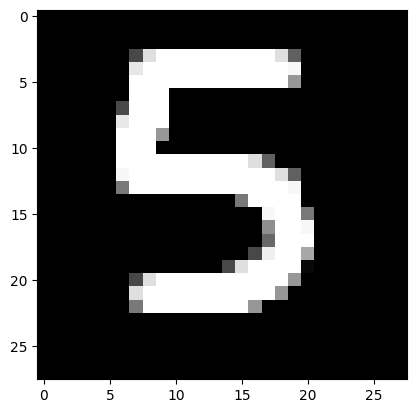

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(array([5]), array([1.], dtype=float32))

In [58]:
predict_digit(model, "/content/Image5.png")